In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob 
from numpy.linalg import eig

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from typing import List, Set, Dict, Tuple, Optional

%matplotlib inline

In [28]:
#Get adjusting closing prices from each {sector}.csv file
#for f in glob.glob('*.csv'):
#    df = pd.concat(pd.read_csv(f, usecols=[0,5], index_col = [0]), ignore_index = True, axis = 1)

df = pd.concat([pd.read_csv(f, usecols=[0,5], index_col = [0]) for f in glob.glob('*.csv')], ignore_index = True, axis = 1)

In [29]:
df_spx = pd.read_csv("SPX/^GSPC.csv", usecols = [0,5], index_col=[0], parse_dates=True)
df_spx_ret = df_spx.pct_change().dropna()
df_spx_ret.head()

Adj Close
Date                 
1998-12-23   0.020747
1998-12-24  -0.001848
1998-12-28  -0.000636
1998-12-29   0.013317
1998-12-30  -0.007956

In [30]:
#Change column names to sector names
labels = [ f[0:3] for f in glob.glob('*.csv') ]
df.columns = labels

In [31]:
ret = df.pct_change().dropna()
ret.head()

XLB       XLE       XLF       XLI       XLK       XLP  \
Date                                                                     
1998-12-23  0.010504  0.020820  0.014743  0.017452  0.023893  0.024174   
1998-12-24  0.023014 -0.005263  0.006607  0.013193 -0.003810 -0.001727   
1998-12-28 -0.008709 -0.005291 -0.013123  0.005208  0.002867 -0.005767   
1998-12-29  0.018302  0.009973  0.010638  0.014247  0.002861  0.022042   
1998-12-30 -0.002876 -0.015142 -0.003949 -0.004471 -0.003802 -0.006243   

                 XLU       XLV       XLY  
Date                                      
1998-12-23 -0.004191  0.022472  0.004294  
1998-12-24  0.018412  0.006107  0.018327  
1998-12-28 -0.005167 -0.014563 -0.008999  
1998-12-29  0.016615  0.022167  0.021792  
1998-12-30 -0.008172 -0.008436 -0.008294

In [62]:
ret.corr()

XLB       XLE       XLF       XLI       XLK       XLP       XLU  \
XLB  1.000000  0.689691  0.638883  0.796218  0.567990  0.536680  0.491258   
XLE  0.689691  1.000000  0.530977  0.631114  0.458326  0.457502  0.518721   
XLF  0.638883  0.530977  1.000000  0.738744  0.602330  0.545723  0.467431   
XLI  0.796218  0.631114  0.738744  1.000000  0.722927  0.608598  0.530365   
XLK  0.567990  0.458326  0.602330  0.722927  1.000000  0.438886  0.435273   
XLP  0.536680  0.457502  0.545723  0.608598  0.438886  1.000000  0.539365   
XLU  0.491258  0.518721  0.467431  0.530365  0.435273  0.539365  1.000000   
XLV  0.591914  0.483204  0.592357  0.706325  0.648014  0.568799  0.492276   
XLY  0.699790  0.533158  0.731356  0.810023  0.692061  0.609904  0.485925   

          XLV       XLY  
XLB  0.591914  0.699790  
XLE  0.483204  0.533158  
XLF  0.592357  0.731356  
XLI  0.706325  0.810023  
XLK  0.648014  0.692061  
XLP  0.568799  0.609904  
XLU  0.492276  0.485925  
XLV  1.000000  0.683153  
XLY  0.683153  1.000000

In [52]:
## Function that returns Eigenvectors and Eigenvalues from returns
def get_eigen(returns: pd.DataFrame) -> Tuple [np.ndarray, np.ndarray]:
    
    eig_vals, eig_vec = eig(returns.corr())
    
    #Sort Eigenvalues (largest to smallest)
    idx = np.argsort(eig_vals)[::-1]
    eig_vals = eig_vals[idx]
    eig_vec = eig_vec[:,idx]
    return eig_vals, eig_vec

In [53]:
def eig_val_xy(eig_val: np.ndarray) -> Tuple[List, List]:
    x = list(range(eig_val.size))
    y = [val / sum (eig_val) for val in eig_val]
    return x, y

In [54]:
def plot_eig(eig_val: np.ndarray):
    x, y = eig_val_xy(eig_val)
    fig = figure()
    plt.figure(figsize =(10,10))
    plt.bar(x, y)
    plt.plot(np.cumsum(y), color = 'c')
    plt.title("Cumalative Explained Variance")
    return fig

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

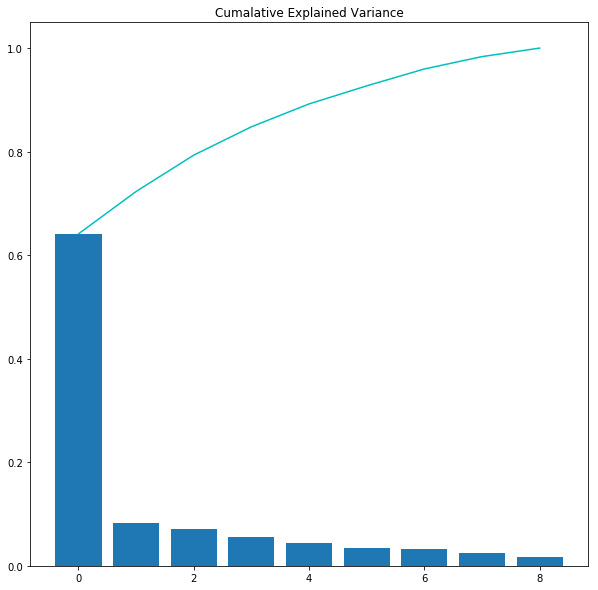

In [55]:
# Get Eigenvectors and Eigenvalues
eig_val, eig_vec = get_eigen(ret)
plot_eig(eig_val)

array([-0.35036066, -0.06090929, -0.41665725, -0.17554234, -0.13155931,
        0.13085289, -0.57981609,  0.36480476, -0.40671803])

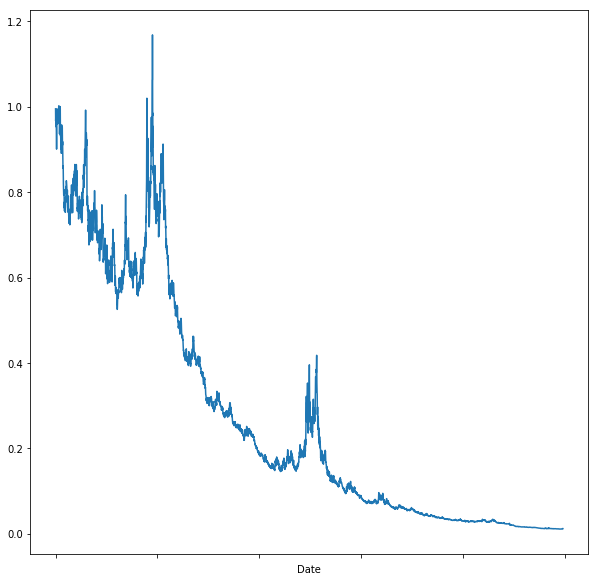

In [56]:
#plot 1st eigenvector against the market
y1 = eig_vec[0,:]
(ret.dot(y1)+1).cumprod().plot(figsize = (10,10))
y1

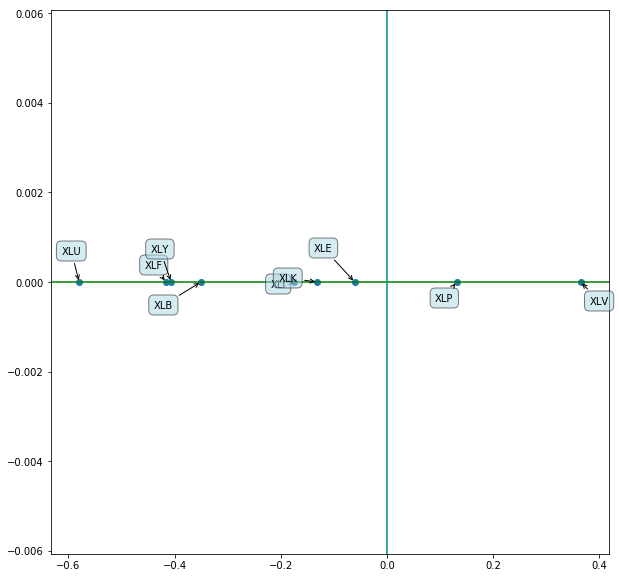

In [57]:
#project eigenvectors in 1-d
y1 = eig_vec[0,:]

plt.figure(figsize =(10,10))
plt.scatter(y1, [0]*9, marker = 'o')
plt.axhline(y = 0, color = 'g')
plt.axvline(x = 0, color = 'darkcyan')

for label, x_, y_ in zip(labels, y1, [0]*9):
    plt.annotate(
        label,
        xy=(x_, y_), xytext=(np.random.randint(low =-30, high =30), np.random.randint(low =-30, high =30)),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

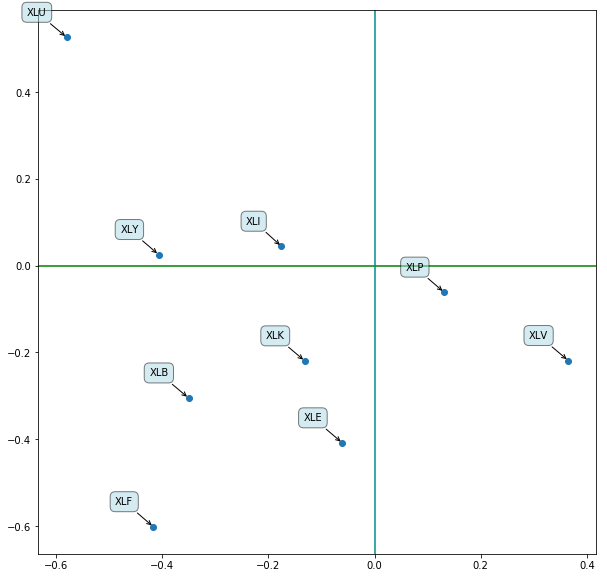

In [58]:
#project eigenvectors in 2-d
y1 = eig_vec[0,:]
y2 = eig_vec[1,:]

plt.figure(figsize =(10,10))
plt.scatter(y1, y2, marker = 'o')
plt.axhline(y = 0, color = 'g')
plt.axvline(x = 0, color = 'darkcyan')

for label, x_, y_ in zip(labels, y1, y2):
    plt.annotate(
        label,
        xy=(x_, y_), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [59]:
## Interactive covariance
def eig_vec_calc(returns, window, start = 0):
    eig_val, _ = get_eigen(returns.iloc[start:start+window,:].cov())
    x,y = eig_val_xy(eig_val)
    plt.figure(figsize =(10,10))
    plt.plot(np.cumsum(y), color = 'c')
    plt.ylim((0,1))
    plt.bar(x, y)
    plt.title('Date: {} - {}'.format(returns.index[start], returns.index[start+window]))

In [60]:

interact(eig_vec_calc, returns = fixed(ret), window = (30,300,10), start = (0,4800,30))

interactive(children=(IntSlider(value=160, description='window', max=300, min=30, step=10), IntSlider(value=0,â€¦

<function __main__.eig_vec_calc(returns, window, start=0)>